In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error, recall_score, precision_score, mean_absolute_error, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb
import lightgbm as lgb

sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp "/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/metadata.csv" "/content/"


In [ ]:
# prompt: get a variable to load the csv file name metadata.csv from archive (1) from mydeive

csv_file_path = '/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/metadata.csv'
metadata_df = pd.read_csv(csv_file_path)

In [ ]:
metadata_df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [ ]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [ ]:
#csv_file_paths = '/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/data/00002.csv'
#experiment_df = pd.read_csv(csv_file_paths)
#experiment_df.head()


In [ ]:
unique_battery_ids = metadata_df['battery_id'].unique()
print(unique_battery_ids)


['B0047' 'B0045' 'B0048' 'B0046' 'B0043' 'B0032' 'B0039' 'B0040' 'B0029'
 'B0028' 'B0042' 'B0034' 'B0038' 'B0033' 'B0030' 'B0041' 'B0027' 'B0044'
 'B0036' 'B0025' 'B0026' 'B0031' 'B0049' 'B0050' 'B0052' 'B0051' 'B0006'
 'B0005' 'B0007' 'B0018' 'B0053' 'B0054' 'B0056' 'B0055']


In [ ]:
unique_uid = metadata_df['ambient_temperature'].unique()
print(unique_uid)

[ 4 24 22 43 44]


In [ ]:
unique_test_id = metadata_df['test_id'].unique()
print(unique_test_id)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
metadata_df.isna().sum()

,0
type,0
start_time,0
ambient_temperature,0
battery_id,0
test_id,0
uid,0
filename,0
Capacity,4771
Re,5609
Rct,5609


In [ ]:
# prompt: get a for loop to cheeck the percentage of missing information for each column

for col in metadata_df.columns:
  missing_percentage = metadata_df[col].isnull().sum() / len(metadata_df) * 100
  print(f"Column '{col}': {missing_percentage:.2f}% missing values")


Column 'type': 0.00% missing values
Column 'start_time': 0.00% missing values
Column 'ambient_temperature': 0.00% missing values
Column 'battery_id': 0.00% missing values
Column 'test_id': 0.00% missing values
Column 'uid': 0.00% missing values
Column 'filename': 0.00% missing values
Column 'Capacity': 63.07% missing values
Column 'Re': 74.14% missing values
Column 'Rct': 74.14% missing values


In [ ]:
metadata_df.duplicated().sum()

np.int64(0)

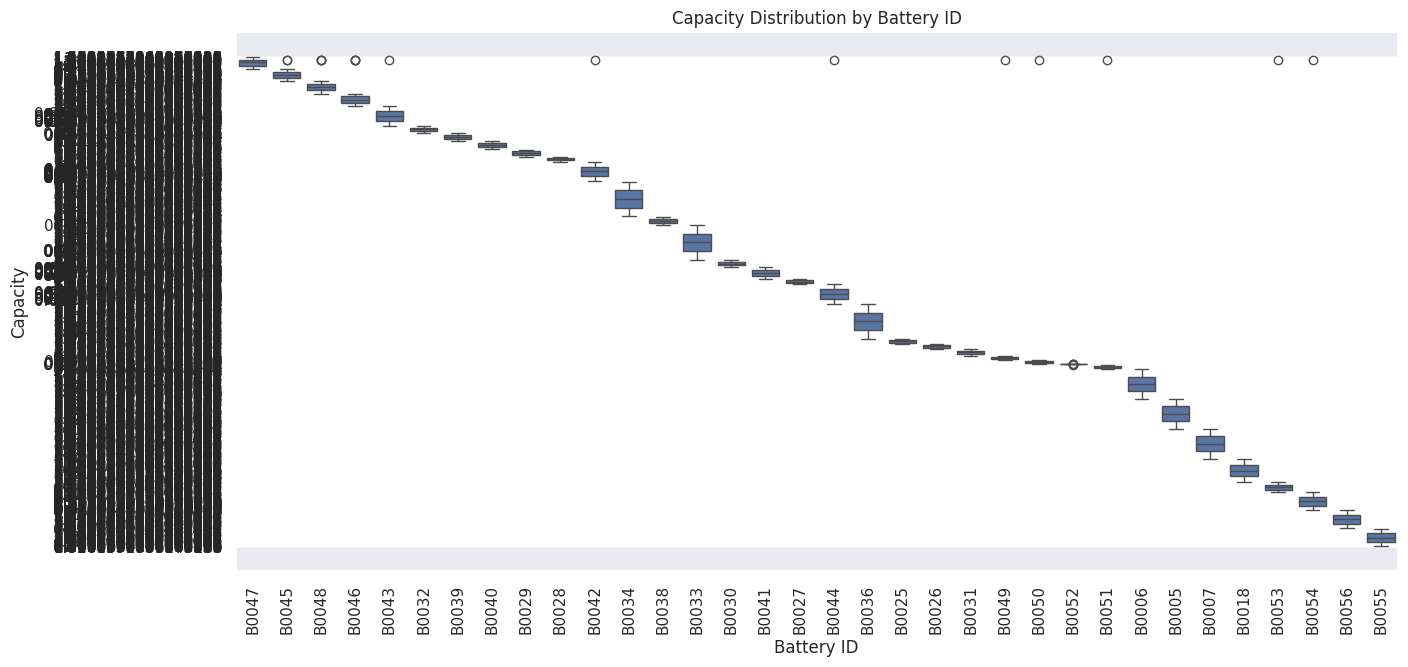

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(15, 7))

# Boxplot to visualize capacity across battery_ids
sns.boxplot(x='battery_id', y='Capacity', data=metadata_df)
plt.xticks(rotation=90)
plt.xlabel('Battery ID')
plt.ylabel('Capacity')
plt.title("Capacity Distribution by Battery ID")
plt.show()

In [ ]:
# Mean Re and Rct grouped by battery

# Convert 'Re' and 'Rct' to numeric, coercing errors to NaN
metadata_df['Re'] = pd.to_numeric(metadata_df['Re'], errors='coerce')
metadata_df['Rct'] = pd.to_numeric(metadata_df['Rct'], errors='coerce')

impedance_summary = metadata_df.groupby('battery_id')[['Re', 'Rct']].mean()
print(impedance_summary.sort_values(by='Re', ascending=False))

                      Re           Rct
battery_id                            
B0038       1.444839e-01  1.644239e-01
B0034       1.252533e-01  1.472626e-01
B0040       1.225589e-01  1.385718e-01
B0039       1.041319e-01  1.218759e-01
B0036       1.031345e-01  1.273352e-01
B0056       1.024474e-01  1.837010e-01
B0053       1.013836e-01  1.610181e-01
B0054       1.003669e-01  1.738652e-01
B0027       9.917740e-02  1.244205e-01
B0055       9.742747e-02  1.616981e-01
B0026       9.011823e-02  1.148913e-01
B0033       8.969975e-02  1.153484e-01
B0044       8.294249e-02  1.882437e-01
B0046       8.176339e-02  2.160649e-01
B0048       8.028774e-02  2.293387e-01
B0028       8.002976e-02  1.081472e-01
B0051       7.833936e-02  1.721921e-01
B0042       7.685226e-02  1.618374e-01
B0045       7.276125e-02  2.371797e-01
B0032       7.221722e-02  8.042184e-02
B0043       7.048841e-02  1.695115e-01
B0006       7.005151e-02  9.302025e-02
B0047       6.575817e-02  2.131596e-01
B0030       6.418748e-02 

In [ ]:
# prompt: clean my dataset

# Handle missing values: Impute with the mean of the column
for col in ['Capacity', 'Re', 'Rct', 'ambient_temperature']:
  if metadata_df[col].isnull().sum() > 0:
    if metadata_df[col].dtype in ['float64', 'int64']:
      mean_val = metadata_df[col].mean()
      metadata_df[col] = metadata_df[col].fillna(mean_val)
    elif metadata_df[col].dtype == 'object':
      # For categorical columns, you might want to use the mode or a placeholder
      mode_val = metadata_df[col].mode()[0] if not metadata_df[col].mode().empty else 'Unknown'
      metadata_df[col] = metadata_df[col].fillna(mode_val)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(metadata_df.isna().sum())

# Remove duplicate rows
metadata_df.drop_duplicates(inplace=True)

# Verify duplicate rows are handled
print(f"\nNumber of duplicate rows after removal: {metadata_df.duplicated().sum()}")

# Display the first few rows of the cleaned dataframe
print("\nFirst 5 rows of the cleaned DataFrame:")
print(metadata_df.head())

# Display info of the cleaned dataframe
print("\nInfo of the cleaned DataFrame:")
metadata_df.info()


Missing values after imputation:
type                   0
start_time             0
ambient_temperature    0
battery_id             0
test_id                0
uid                    0
filename               0
Capacity               0
Re                     0
Rct                    0
dtype: int64

Number of duplicate rows after removal: 0

First 5 rows of the cleaned DataFrame:
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B00

In [ ]:
#Group by Battery and Test Type

# Group batteries by test type (or test ID, or protocol)
battery_test_groups = metadata_df.groupby('battery_id')['test_id'].unique().reset_index()

print(battery_test_groups)


   battery_id                                            test_id
0       B0005  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1       B0006  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
2       B0007  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
3       B0018  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
4       B0025  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
5       B0026  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
6       B0027  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
7       B0028  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
8       B0029  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
9       B0030  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
10      B0031  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
11      B0032  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
12      B0033  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
13      B0034  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
14      B0036  [0, 1, 2, 

In [ ]:
test_counts = metadata_df.groupby('battery_id')['test_id'].nunique().sort_values(ascending=False)
print(test_counts)

battery_id
B0005    616
B0006    616
B0007    616
B0036    486
B0033    486
B0034    486
B0018    319
B0044    275
B0043    275
B0042    275
B0054    253
B0055    252
B0056    252
B0047    184
B0045    184
B0046    184
B0048    184
B0041    163
B0053    137
B0039    122
B0038    122
B0040    122
B0032     97
B0031     97
B0029     97
B0030     97
B0026     80
B0025     80
B0028     80
B0027     80
B0052     62
B0051     62
B0050     62
B0049     62
Name: test_id, dtype: int64


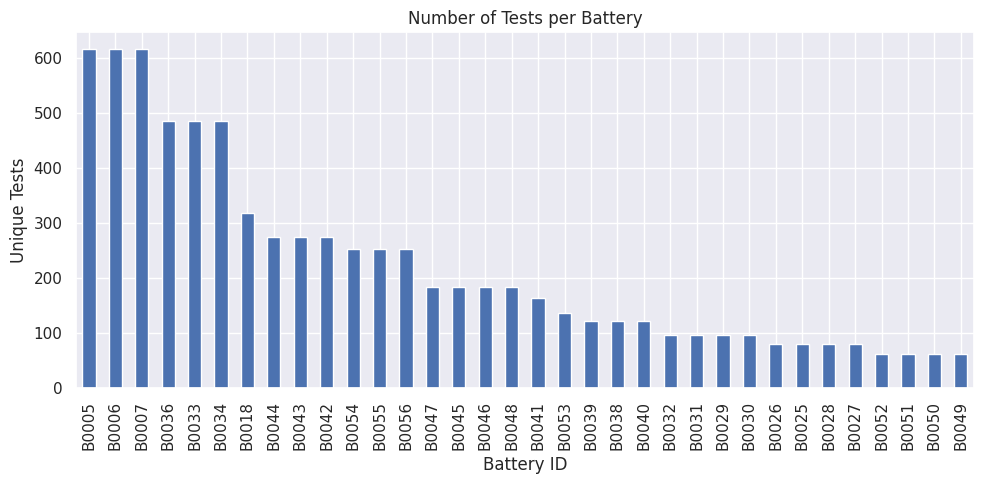

In [ ]:
test_counts.plot(kind='bar', figsize=(10, 5), title='Number of Tests per Battery')
plt.xlabel('Battery ID')
plt.ylabel('Unique Tests')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
battery_tests = metadata_df.groupby('battery_id')['test_id'].apply(set).reset_index()
battery_tests['test_profile'] = battery_tests['test_id'].apply(lambda x: '-'.join(sorted(map(str, x))))
grouped = battery_tests.groupby('test_profile')['battery_id'].apply(list)
print(grouped)


test_profile
0-1-10-100-101-102-103-104-105-106-107-108-109-11-110-111-112-113-114-115-116-117-118-119-12-120-121-122-123-124-125-126-127-128-129-13-130-131-132-133-134-135-136-137-138-139-14-140-141-142-143-144-145-146-147-148-149-15-150-151-152-153-154-155-156-157-158-159-16-160-161-162-163-164-165-166-167-168-169-17-170-171-172-173-174-175-176-177-178-179-18-180-181-182-183-184-185-186-187-188-189-19-190-191-192-193-194-195-196-197-198-199-2-20-200-201-202-203-204-205-206-207-208-209-21-210-211-212-213-214-215-216-217-218-219-22-220-221-222-223-224-225-226-227-228-229-23-230-231-232-233-234-235-236-237-238-239-24-240-241-242-243-244-245-246-247-248-249-25-250-251-252-253-254-255-256-257-258-259-26-260-261-262-263-264-265-266-267-268-269-27-270-271-272-273-274-275-276-277-278-279-28-280-281-282-283-284-285-286-287-288-289-29-290-291-292-293-294-295-296-297-298-299-3-30-300-301-302-303-304-305-306-307-308-309-31-310-311-312-313-314-315-316-317-318-319-32-320-321-322-323-324-325-326-32

In [ ]:
# Suppose you’ve got a dictionary like this:
subset_groups = {
    'Subset_1': ['B0005', 'B0006', 'B0007', 'B0018'],
    'Subset_2': ['B0033', 'B0034', 'B0036'],
    'Subset_3': ['B0025', 'B0026', 'B0027', 'B0028'],
    'Subset_4': ['B0041', 'B0042', 'B0043', 'B0044'],
    'Subset_5': ['B0029', 'B0030', 'B0031', 'B0032'],
    'Subset_6': ['B0053', 'B0054', 'B0055', 'B0056'],
    'Subset_7': ['B0045', 'B0046', 'B0047', 'B0048'],
    'Subset_8': ['B0049', 'B0050', 'B0051', 'B0052'],
    'Subset_9': ['B0038', 'B0039', 'B0040',]
}

# Add a new column in your metadata
def assign_subset(battery_id):
    for subset, batteries in subset_groups.items():
        if battery_id in batteries:
            return subset
    return 'Unknown'

metadata_df['subset'] = metadata_df['battery_id'].apply(assign_subset)


In [ ]:
metadata_df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,subset
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,-4.976500e+11,1.055903e+12,Subset_7
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,[],5.605783e-02,2.009702e-01,Subset_7
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,[],-4.976500e+11,1.055903e+12,Subset_7
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,[],5.319186e-02,1.647340e-01,Subset_7
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,-4.976500e+11,1.055903e+12,Subset_7


In [ ]:
# Example: average capacity per subset

# Convert 'Capacity' to numeric, coercing errors to NaN
metadata_df['Capacity'] = pd.to_numeric(metadata_df['Capacity'], errors='coerce')

subset_summary = metadata_df.groupby('subset')['Capacity'].mean().sort_values(ascending=False)
print(subset_summary)

subset
Subset_3    1.791848
Subset_5    1.721201
Subset_1    1.581652
Subset_2    1.498364
Subset_9    1.456794
Subset_7    1.091763
Subset_6    1.057529
Subset_8    0.932723
Subset_4    0.823778
Name: Capacity, dtype: float64


In [ ]:
#Let’s use Capacity as the target and ambient_temperature, Re, and Rct as predictors.

# Choose features and target
features = ['ambient_temperature', 'Re', 'Rct']
target = 'Capacity'

# Create results container
subset_results = {}

# Loop through each subset
for subset in metadata_df['subset'].unique():
    subset_df = metadata_df[metadata_df['subset'] == subset]

    # Drop rows with missing values (if any)
    subset_df = subset_df.dropna(subset=features + [target])

    X = subset_df[features]
    y = subset_df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    subset_results[subset] = {
        'MAE': round(mae, 4),
        'R²': round(r2, 4),
        'Sample Size': len(subset_df)
    }

# Display results
for subset, results in subset_results.items():
    print(f"{subset}: MAE={results['MAE']}, R²={results['R²']}, Samples={results['Sample Size']}")


Subset_7: MAE=0.2592, R²=-0.1345, Samples=288
Subset_4: MAE=0.4189, R²=0.4808, Samples=403
Subset_5: MAE=0.0499, R²=-0.0006, Samples=160
Subset_9: MAE=0.1382, R²=0.6506, Samples=141
Subset_3: MAE=0.0189, R²=-0.1217, Samples=112
Subset_2: MAE=0.1306, R²=-0.0064, Samples=591
Subset_8: MAE=0.3298, R²=-0.0181, Samples=75
Subset_1: MAE=0.1664, R²=-0.0266, Samples=636
Subset_6: MAE=0.1068, R²=-0.0272, Samples=363


In [ ]:
#Load and Inspect Cycle-Level Data

experiment_file_path = '/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/data/00003.csv'
experiment_df = pd.read_csv(experiment_file_path)
print(experiment_df.head())
print(experiment_df.columns)
print(experiment_df.describe())
print(experiment_df.info())

   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.486189          0.001417              5.990142         -0.0006   
1          3.746592          1.489057              5.992528          1.4995   
2          3.775438          1.490426              5.991340          1.4995   
3          3.794844          1.491527              6.003554          1.4995   
4          3.811691          1.491425              6.026729          1.4995   

   Voltage_charge    Time  
0           0.002   0.000  
1           4.618   2.594  
2           4.669   8.922  
3           4.694  15.234  
4           4.707  21.516  
Index(['Voltage_measured', 'Current_measured', 'Temperature_measured',
       'Current_charge', 'Voltage_charge', 'Time'],
      dtype='object')
       Voltage_measured  Current_measured  Temperature_measured  \
count       1621.000000       1621.000000           1621.000000   
mean           4.193521          0.520792              6.279191   
std        

In [ ]:
# Find discharge files with Capacity available
# Filter metadata for discharge files with usable capacity info
valid_cycle_files = metadata_df[
    (metadata_df['type'].isin(['discharge', 'charge'])) &
    (metadata_df['Capacity'].apply(lambda x: str(x).replace('.', '', 1).isdigit()))
]['filename'].unique()

print(f"Found {len(valid_cycle_files)} valid cycle files.")
print("Example:", valid_cycle_files[:5])


Found 2769 valid cycle files.
Example: ['00001.csv' '00005.csv' '00007.csv' '00009.csv' '00011.csv']


In [ ]:
# Load one of the valid cycle logs
cycle_df = pd.read_csv(f"/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/data/{valid_cycle_files[0]}")

print(cycle_df.head())
print(cycle_df.columns)


   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277         -0.995093              6.250255        1.0000   
3          4.019506         -0.996731              6.302176        1.0000   
4          4.004763         -0.992845              6.361645        1.0000   

   Voltage_load    Time  
0         0.000   0.000  
1         4.262   9.360  
2         3.465  23.281  
3         3.451  36.406  
4         3.438  49.625  
Index(['Voltage_measured', 'Current_measured', 'Temperature_measured',
       'Current_load', 'Voltage_load', 'Time'],
      dtype='object')


In [ ]:
# Merge experiment data with metadata labels
filename = '00001.csv'  # example
experiment_df = pd.read_csv(f"/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/data/{filename}")
capacity_label = metadata_df.loc[metadata_df['filename'] == filename, 'Capacity'].values[0]


In [ ]:
capacity_label

np.float64(1.6743047446975208)

In [ ]:
#Let’s define a function to extract useful cycle-level features:

def extract_features(file_path, filename, metadata_df):
    try:
        df = pd.read_csv(file_path)

        # Ensure numeric data (some files may be malformed)
        for col in ['Voltage_measured', 'Current_measured', 'Temperature_measured',
                    'Current_load', 'Voltage_load', 'Time']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Drop NaNs if needed
        df.dropna(inplace=True)

        # Time-based metrics
        duration = df['Time'].iloc[-1] - df['Time'].iloc[0]
        voltage_drop = df['Voltage_measured'].iloc[0] - df['Voltage_measured'].iloc[-1]

        # Basic statistical features
        features = {
            'filename': filename,
            'mean_voltage': df['Voltage_measured'].mean(),
            'max_voltage': df['Voltage_measured'].max(),
            'min_voltage': df['Voltage_measured'].min(),
            'voltage_drop': voltage_drop,

            'mean_current': df['Current_measured'].mean(),
            'max_current': df['Current_measured'].max(),
            'min_current': df['Current_measured'].min(),

            'temperature_mean': df['Temperature_measured'].mean(),
            'temperature_max': df['Temperature_measured'].max(),

            'current_load_mean': df['Current_load'].mean(),
            'voltage_load_mean': df['Voltage_load'].mean(),

            'duration_seconds': duration,
        }

        # Add Capacity as label from metadata
        capacity = metadata_df.loc[metadata_df['filename'] == filename, 'Capacity'].values[0]
        features['capacity'] = float(capacity) if capacity != '[]' else np.nan

        return features

    except Exception as e:
        print(f"Error in file {filename}: {e}")
        return None



In [ ]:
# Run feature extraction on all files
#feature_list = []
#data_dir = '/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/data/'

#for filename in valid_cycle_files:
#    path = f"{data_dir}{filename}"
#    features = extract_features(path, filename, metadata_df)
#    if features:
#        feature_list.append(features)

# Combine into a DataFrame
#features_df = pd.DataFrame(feature_list)


In [ ]:
features_df = pd.read_csv('/content/drive/Othercomputers/My Laptop/my drive/features.csv')

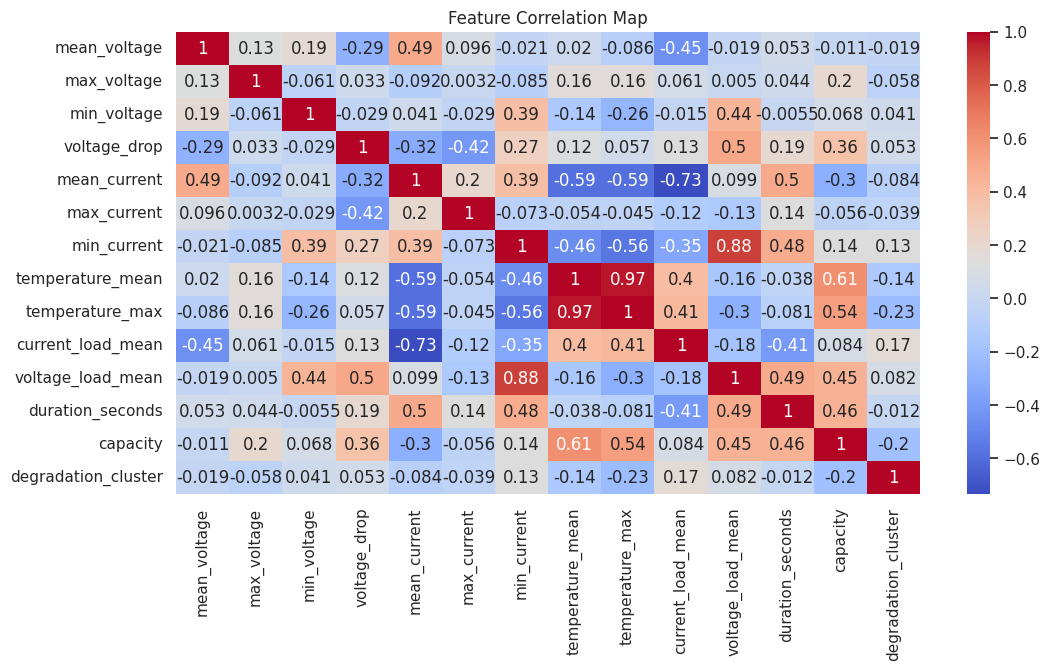

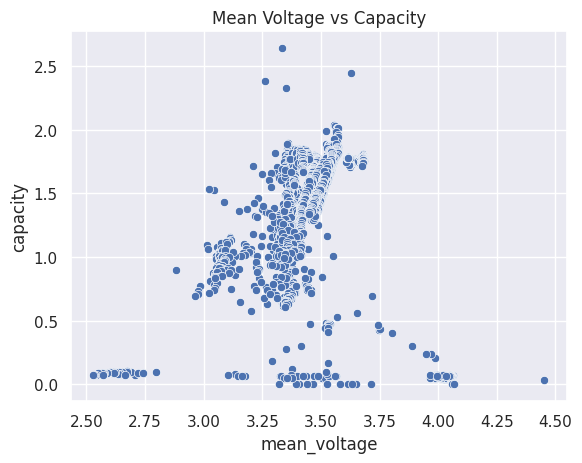

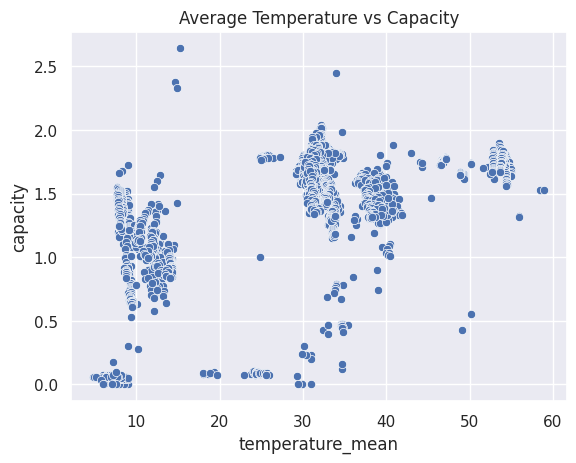

In [ ]:
#Visualize Key Trends, Plot how core metrics relate to the capacity label (your SOH proxy):

# Correlation heatmap
plt.figure(figsize=(12, 6))
# Exclude the 'filename' column before calculating correlation
sns.heatmap(features_df.drop('filename', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Map")
plt.show()

# Voltage vs Capacity
sns.scatterplot(data=features_df, x='mean_voltage', y='capacity')
plt.title("Mean Voltage vs Capacity")
plt.show()

# Temperature vs Capacity
sns.scatterplot(data=features_df, x='temperature_mean', y='capacity')
plt.title("Average Temperature vs Capacity")
plt.show()

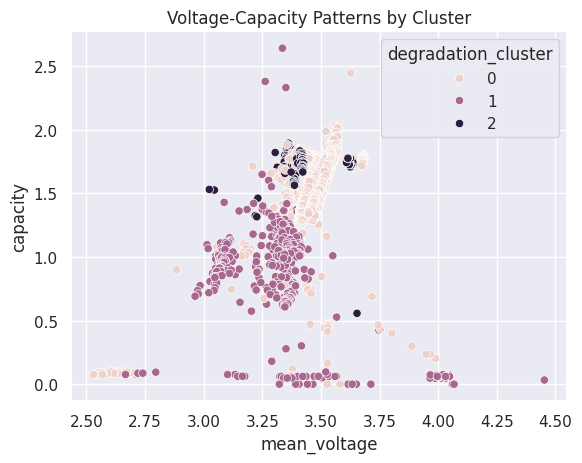

In [ ]:
#Detect Patterns or Regimes: You can cluster batteries into degradation regimes:

from sklearn.cluster import KMeans

X = features_df[['mean_voltage', 'mean_current', 'temperature_mean']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
features_df['degradation_cluster'] = kmeans.labels_

# Visualize clusters
sns.scatterplot(data=features_df, x='mean_voltage', y='capacity', hue='degradation_cluster')
plt.title("Voltage-Capacity Patterns by Cluster")
plt.show()


In [ ]:
#Train a quick model and check feature importance


X = features_df.drop(columns=['filename', 'capacity'])
y = features_df['capacity']
model = RandomForestRegressor().fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Predictive Features:\n", importances)

Top Predictive Features:
 duration_seconds       0.546653
temperature_mean       0.227905
voltage_drop           0.100608
voltage_load_mean      0.044560
min_voltage            0.040366
current_load_mean      0.016186
mean_current           0.007463
temperature_max        0.006110
mean_voltage           0.004808
max_voltage            0.003668
min_current            0.001264
max_current            0.000396
degradation_cluster    0.000013
dtype: float64


In [ ]:
### State of Health (SOH)

In [ ]:
#We’ll estimate initial capacity per battery as its maximum recorded capacity (from metadata).
# prompt: group the inittial_cap by battery_id

initial_cap = metadata_df.groupby('battery_id')['Capacity'].max().reset_index()
initial_cap.columns = ['battery_id', 'initial_capacity']

# Merge features_df with metadata_df to get the battery_id for each filename
features_df = features_df.merge(metadata_df[['filename', 'battery_id']], on='filename', how='left')

# Merge features_df with initial_cap on battery_id
features_df = features_df.merge(initial_cap, on='battery_id', how='left')

# Calculate SOH
features_df['SOH'] = features_df['capacity'] / features_df['initial_capacity']

In [ ]:
features_df.head()

,filename,mean_voltage,max_voltage,min_voltage,voltage_drop,mean_current,max_current,min_current,temperature_mean,temperature_max,current_load_mean,voltage_load_mean,duration_seconds,capacity,degradation_cluster,battery_id,initial_capacity,SOH
0,00001.csv,3.475266,4.246764,2.470612,0.917355,-0.952767,0.000252,-1.001101,8.272423,12.376816,0.957153,2.817939,6436.141,1.674305,1,B0047,1.674305,1.000000
1,00005.csv,3.476559,4.186636,2.477662,1.058479,-0.983889,-0.001536,-0.998142,8.210715,11.314903,0.988347,2.881352,5650.265,1.524366,1,B0047,1.674305,0.910447
2,00007.csv,3.470767,4.199923,2.470710,1.072543,-0.983889,-0.000746,-1.000307,7.954455,11.624528,0.988211,2.884255,5590.907,1.508076,1,B0047,1.674305,0.900718
3,00009.csv,3.467551,4.199569,2.465458,0.990612,-0.978947,0.000303,-0.998280,7.985865,11.092924,0.983299,2.843420,5543.610,1.483558,1,B0047,1.674305,0.886074
4,00011.csv,3.462839,4.199397,2.465765,0.959758,-0.976262,0.000422,-0.998683,8.009427,11.020979,0.980731,2.829371,5499.046,1.467139,1,B0047,1.674305,0.876268


In [ ]:
#We’ll prep for model training by cleaning and encoding:

# Drop unnecessary columns (excluding battery_id for now as we will encode it)
X = features_df.drop(columns=['filename', 'capacity', 'initial_capacity'])
y_soh = features_df['SOH']

# Apply one-hot encoding to 'battery_id'
X_encoded = pd.get_dummies(X, columns=['battery_id'], drop_first=True)

# Scale features (using the encoded DataFrame)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
#Train a Baseline SOH Model: Try a simple regression:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_soh, test_size=0.2, random_state=42)
model = RandomForestRegressor().fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.9998255142394535
MAE: 0.0006559669750977248


In [ ]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print(" Gradient Boosting")
print("R²:", round(r2_score(y_test, y_pred_gb), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_gb), 4))


 Gradient Boosting
R²: 0.9999
MAE: 0.0013


In [ ]:
#Support Vector Regression (SVR)

from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regression")
print("R²:", round(r2_score(y_test, y_pred_svr), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_svr), 4))


Support Vector Regression
R²: 0.9241
MAE: 0.0545


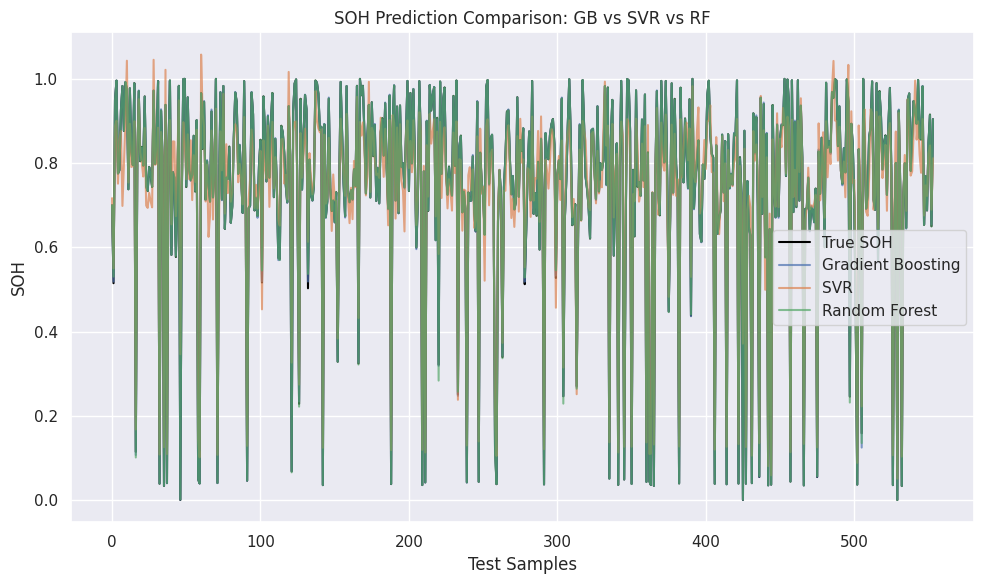

In [ ]:
#Visual Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='True SOH', color='black')
plt.plot(y_pred_gb, label='Gradient Boosting', alpha=0.7)
plt.plot(y_pred_svr, label='SVR', alpha=0.7)
plt.plot(y_pred, label='Random Forest', alpha=0.7)
plt.title("SOH Prediction Comparison: GB vs SVR vs RF")
plt.xlabel("Test Samples")
plt.ylabel("SOH")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#assigning a pseudo-cycle index per battery based on file order.

# Assign cycle index and max cycle per battery
features_df['cycle_index'] = features_df.groupby('battery_id').cumcount()
features_df['total_cycles'] = features_df.groupby('battery_id')['cycle_index'].transform('max')

# Compute RUL
features_df['RUL'] = features_df['total_cycles'] - features_df['cycle_index']


In [ ]:
features_df.head()

,filename,mean_voltage,max_voltage,min_voltage,voltage_drop,mean_current,max_current,min_current,temperature_mean,temperature_max,...,voltage_load_mean,duration_seconds,capacity,degradation_cluster,battery_id,initial_capacity,SOH,cycle_index,total_cycles,RUL
0,00001.csv,3.475266,4.246764,2.470612,0.917355,-0.952767,0.000252,-1.001101,8.272423,12.376816,...,2.817939,6436.141,1.674305,1,B0047,1.674305,1.000000,0,71,71
1,00005.csv,3.476559,4.186636,2.477662,1.058479,-0.983889,-0.001536,-0.998142,8.210715,11.314903,...,2.881352,5650.265,1.524366,1,B0047,1.674305,0.910447,1,71,70
2,00007.csv,3.470767,4.199923,2.470710,1.072543,-0.983889,-0.000746,-1.000307,7.954455,11.624528,...,2.884255,5590.907,1.508076,1,B0047,1.674305,0.900718,2,71,69
3,00009.csv,3.467551,4.199569,2.465458,0.990612,-0.978947,0.000303,-0.998280,7.985865,11.092924,...,2.843420,5543.610,1.483558,1,B0047,1.674305,0.886074,3,71,68
4,00011.csv,3.462839,4.199397,2.465765,0.959758,-0.976262,0.000422,-0.998683,8.009427,11.020979,...,2.829371,5499.046,1.467139,1,B0047,1.674305,0.876268,4,71,67


In [ ]:
#Use the same scaled X_scaled features and plug in the new RUL target.

y_rul = features_df['RUL']


In [ ]:
#Train a Baseline RUL Model: Random forest

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_rul, test_size=0.2, random_state=42)
rul_model = RandomForestRegressor().fit(X_train, y_train)

y_pred_rul = rul_model.predict(X_test)
print("RUL Model")
print("R²:", round(r2_score(y_test, y_pred_rul), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rul), 2))


RUL Model
R²: 0.9595
MAE: 5.24


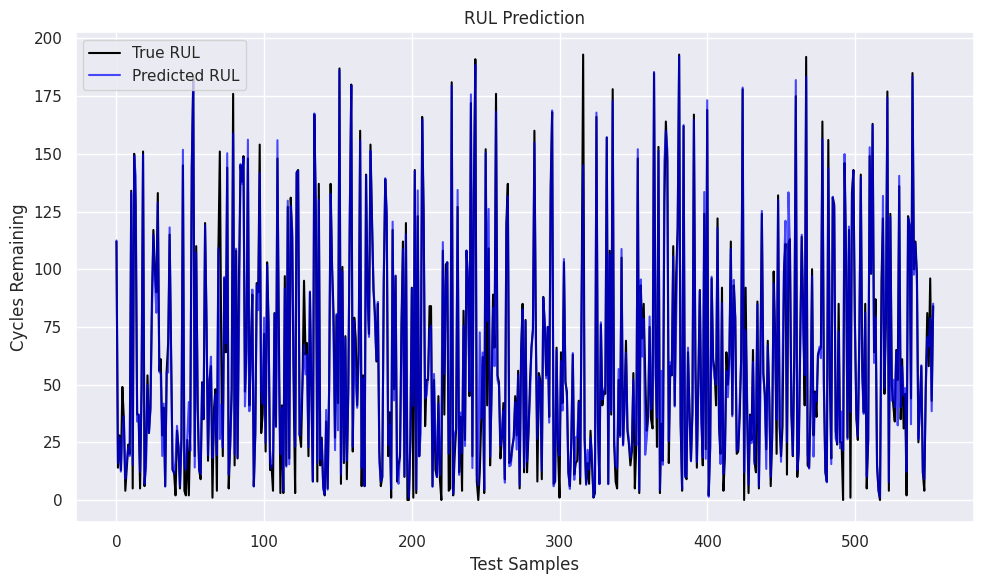

In [ ]:
#visualize the prediction accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='True RUL', color='black')
plt.plot(y_pred_rul, label='Predicted RUL', color='blue', alpha=0.7)
plt.legend()
plt.title("RUL Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Cycles Remaining")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#We’ll extract impedance files from the metadata:

impedance_files = metadata_df[metadata_df['type'] == 'impedance']['filename'].unique()
print(f"Found {len(impedance_files)} impedance files.")


Found 1956 impedance files.


In [ ]:
def safe_complex_parse(x):
    try:
        val = complex(str(x).replace('[','').replace(']','').replace(' ',''))
        return abs(val)  # or val.real, val.imag
    except:
        return np.nan


In [ ]:
def extract_impedance_features(file_path, filename):
    try:
        df = pd.read_csv(file_path)
        df['imp_mag'] = df['Battery_impedance'].apply(safe_complex_parse)

        return {
            'filename': filename,
            'imp_mean': df['imp_mag'].mean(),
            'imp_max': df['imp_mag'].max(),
            'imp_min': df['imp_mag'].min(),
            'imp_var': df['imp_mag'].var(),
        }
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None


In [ ]:
#Run the extraction across all impedance files:

impedance_feature_rows = []
base_dir = '/content/drive/Othercomputers/My Laptop/my drive/archive (1)/cleaned_dataset/data/'

for filename in impedance_files:
    path = f"{base_dir}{filename}"
    features = extract_impedance_features(path, filename)
    if features:
        impedance_feature_rows.append(features)

impedance_df = pd.DataFrame(impedance_feature_rows)


In [ ]:
#Aggregate impedance_df to One Row Per Battery

# Merge impedance_df with metadata_df to get the battery_id for each filename
impedance_df = impedance_df.merge(metadata_df[['filename', 'battery_id']], on='filename', how='left')

impedance_summary = impedance_df.groupby('battery_id').agg({
    'imp_mean': 'mean',
    'imp_max': 'max',
    'imp_min': 'min',
    'imp_var': 'mean'
}).reset_index()

In [ ]:
#Merge Cleanly with features_df

features_df = features_df.merge(impedance_summary, on='battery_id', how='left')


In [ ]:
features_df.head()

,filename,mean_voltage,max_voltage,min_voltage,voltage_drop,mean_current,max_current,min_current,temperature_mean,temperature_max,...,battery_id,initial_capacity,SOH,cycle_index,total_cycles,RUL,imp_mean,imp_max,imp_min,imp_var
0,00001.csv,3.475266,4.246764,2.470612,0.917355,-0.952767,0.000252,-1.001101,8.272423,12.376816,...,B0047,1.674305,1.000000,0,71,71,0.237951,0.427481,0.000085,0.004776
1,00005.csv,3.476559,4.186636,2.477662,1.058479,-0.983889,-0.001536,-0.998142,8.210715,11.314903,...,B0047,1.674305,0.910447,1,71,70,0.237951,0.427481,0.000085,0.004776
2,00007.csv,3.470767,4.199923,2.470710,1.072543,-0.983889,-0.000746,-1.000307,7.954455,11.624528,...,B0047,1.674305,0.900718,2,71,69,0.237951,0.427481,0.000085,0.004776
3,00009.csv,3.467551,4.199569,2.465458,0.990612,-0.978947,0.000303,-0.998280,7.985865,11.092924,...,B0047,1.674305,0.886074,3,71,68,0.237951,0.427481,0.000085,0.004776
4,00011.csv,3.462839,4.199397,2.465765,0.959758,-0.976262,0.000422,-0.998683,8.009427,11.020979,...,B0047,1.674305,0.876268,4,71,67,0.237951,0.427481,0.000085,0.004776


In [ ]:
#We’ll prep for model training by cleaning and encoding:

# Drop unnecessary columns (excluding battery_id for now as we will encode it)
X = features_df.drop(columns=['filename', 'capacity', 'initial_capacity', 'SOH', 'RUL'])  # target labels
y_soh = features_df['SOH']
y_rul = features_df['RUL']

# Apply one-hot encoding to 'battery_id'
X_encoded = pd.get_dummies(X, columns=['battery_id'], drop_first=True)

# Scale features (using the encoded DataFrame)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
#SOH Model (Gradient Boosting)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_scaled, y_soh)


GradientBoostingRegressor(random_state=42)

In [ ]:
##SOH Model ( SVR)
svr_model = SVR()
svr_model.fit(X_scaled, y_soh)

SVR()

In [ ]:
#RUL Model (Random Forest)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_scaled, y_rul)


RandomForestRegressor(random_state=42)

In [ ]:
#Evaluate Performance

X_train, X_test, y_soh_train, y_soh_test = train_test_split(X_scaled, y_soh, test_size=0.2, random_state=42)
y_soh_pred = gb_model.predict(X_test)
y_soh_pred_svr = svr_model.predict(X_test)

print("SOH GradientBoost Prediction ")
print("R²:", round(r2_score(y_soh_test, y_soh_pred), 4))
print("MAE:", round(mean_absolute_error(y_soh_test, y_soh_pred), 4))

print("SOH SVR Prediction ")
print("R²:", round(r2_score(y_soh_test, y_soh_pred_svr), 4))
print("MAE:", round(mean_absolute_error(y_soh_test, y_soh_pred_svr), 4))

# RUL
X_train, X_test, y_rul_train, y_rul_test = train_test_split(X_scaled, y_rul, test_size=0.2, random_state=42)
y_rul_pred = rf_model.predict(X_test)

print("RUL Prediction ")
print("R²:", round(r2_score(y_rul_test, y_rul_pred), 4))
print("MAE:", round(mean_absolute_error(y_rul_test, y_rul_pred), 2))


SOH GradientBoost Prediction 
R²: 0.9885
MAE: 0.0182
SOH SVR Prediction 
R²: 0.9509
MAE: 0.0458
RUL Prediction 
R²: 0.9999
MAE: 0.23


RUL Modeling — LSTM + Transformer
To use LSTM or Transformer, we need sequential input, so you’ll reshape your data per battery’s cycle history

In [ ]:
features_df = features_df.sort_values(['battery_id', 'cycle_index'])

# Normalize cycle_index per battery
features_df['cycle_index_norm'] = features_df.groupby('battery_id')['cycle_index'].transform(lambda x: x / x.max())
features_df['voltage_slope'] = features_df.groupby('battery_id')['mean_voltage'].diff().rolling(window=3).mean().fillna(0)
features_df['temp_slope'] = features_df.groupby('battery_id')['temperature_mean'].diff().rolling(window=3).mean().fillna(0)

features_df['voltage_trend'] = features_df.groupby('battery_id')['mean_voltage'].diff().rolling(3).mean().fillna(0)
#features_df['impedance_velocity'] = features_df.groupby('battery_id')['imp_mean'].diff().fillna(0)


# Compute deltas
features_df['voltage_delta'] = features_df.groupby('battery_id')['mean_voltage'].diff().fillna(0)
features_df['temp_delta'] = features_df.groupby('battery_id')['temperature_mean'].diff().fillna(0)


In [ ]:
#Create Sequence Windows

def create_rul_sequences(df, window_size=10):
    sequences = []
    targets = []

    feature_cols = ['mean_voltage', 'temperature_mean', 'duration_seconds','voltage_trend',
                    'voltage_delta', 'temp_delta', 'cycle_index_norm', 'imp_mean',	'imp_max',	'imp_min',	'imp_var', 'voltage_slope', 'temp_slope']

    df = df.sort_values(['battery_id', 'cycle_index'])

    for battery in df['battery_id'].unique():
        battery_df = df[df['battery_id'] == battery]

        feature_matrix = battery_df[feature_cols].values
        rul_series = battery_df['RUL'].values

        for i in range(len(battery_df) - window_size):
            seq = feature_matrix[i:i + window_size]
            target = rul_series[i + window_size]  # predict next cycle's RUL

            sequences.append(seq)
            targets.append(target)

    return np.array(sequences), np.array(targets)




In [ ]:
X_seq, y_seq = create_rul_sequences(features_df, window_size=10)
print("Sequences shape:", X_seq.shape)
print("Targets shape:", y_seq.shape)


Sequences shape: (2435, 10, 13)
Targets shape: (2435,)


In [ ]:
#Define & Train LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Split the sequence data
unique_batteries = features_df['battery_id'].unique()
np.random.shuffle(unique_batteries)

split = int(len(unique_batteries) * 0.8)
train_batteries = unique_batteries[:split]
test_batteries = unique_batteries[split:]

train_df = features_df[features_df['battery_id'].isin(train_batteries)]
test_df = features_df[features_df['battery_id'].isin(test_batteries)]

X_train_seq, y_train_seq = create_rul_sequences(train_df, window_size=10)
X_test_seq, y_test_seq = create_rul_sequences(test_df, window_size=10)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')


In [ ]:
#Evaluate Model Performance

y_pred_seq = model.predict(X_test_seq).flatten()

print("LSTM - RUL")
print("R² Score:", round(r2_score(y_test_seq, y_pred_seq), 4))
print("MAE:", round(mean_absolute_error(y_test_seq, y_pred_seq), 2))


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
LSTM - RUL
R² Score: -1.8793
MAE: 74.38


You can also visualize the predicted RUL versus the true RUL for a subset of the test data to see how well the model is performing visually.

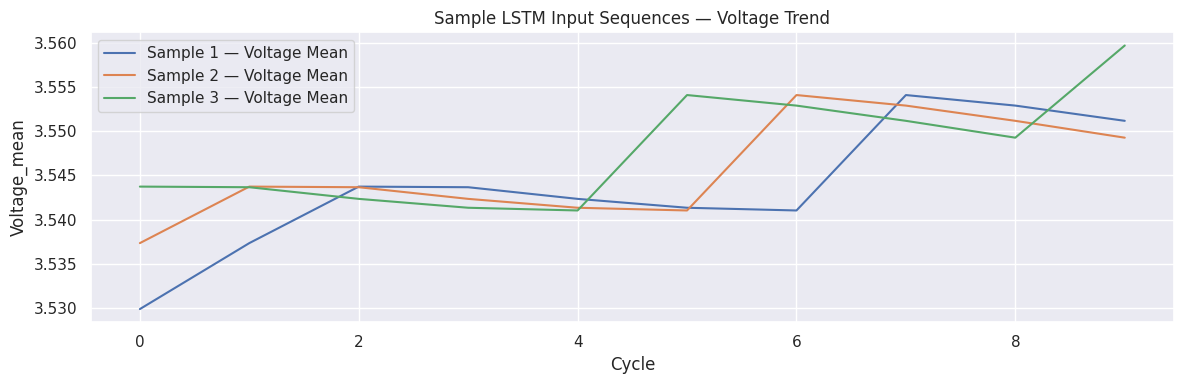

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.plot(X_seq[i][:, 0], label=f'Sample {i+1} — Voltage Mean')
plt.title("Sample LSTM Input Sequences — Voltage Trend")
plt.xlabel("Cycle")
plt.ylabel("Voltage_mean")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Train a GRU Model for RUL

In [ ]:
#Define GRU Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    GRU(32),
    Dense(1)
])

gru_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Train & Evaluate GRU

history = gru_model.fit(X_train_seq, y_train_seq, epochs=30, batch_size=32, validation_split=0.2)

y_pred_gru = gru_model.predict(X_test_seq).flatten()

from sklearn.metrics import r2_score, mean_absolute_error
print("🧪 GRU Performance")
print("R²:", round(r2_score(y_test_seq, y_pred_gru), 4))
print("MAE:", round(mean_absolute_error(y_test_seq, y_pred_gru), 2))



Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 51.3381 - val_loss: 38.6092
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 51.0373 - val_loss: 35.0531
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 49.9839 - val_loss: 32.9397
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 46.5776 - val_loss: 31.9258
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 45.2504 - val_loss: 31.2622
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 42.3864 - val_loss: 30.6962
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 44.3720 - val_loss: 30.1794
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 43.9549 - val_loss: 29.7277
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 41.9315 - val_loss: 29.3000
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 41.5357 - val_loss: 28.9053
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 42.9367 - val_loss: 28.5451
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s